<a href="https://colab.research.google.com/github/gengel27/Set-energy/blob/main/Set_energy_step_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown <br><center><img src='https://raw.githubusercontent.com/dropcreations/FFmpeg-for-Google-Colab/32abf44ff4c8d145a94a24611f01141926a8daaa/FFmpeg-Logo.svg' height="40" alt="FFmpeg-logo"/></center>
#@markdown <center><h3><b>Install FFmpeg</b></h3></center><br>
from IPython.display import clear_output
!sudo curl -L https://github.com/BtbN/FFmpeg-Builds/releases/download/latest/ffmpeg-master-latest-linux64-gpl.tar.xz -o /usr/local/bin/ffmpeg.tar.xz
clear_output()
%cd /usr/local/bin/
clear_output()
!7z e /usr/local/bin/ffmpeg.tar.xz
clear_output()
!7z e /usr/local/bin/ffmpeg.tar
clear_output()
!sudo chmod a+rx /usr/local/bin/ffmpeg
clear_output()
%cd /content/
!sudo curl -L https://mkvtoolnix.download/appimage/MKVToolNix_GUI-70.0.0-x86_64.AppImage -o /usr/local/bin/MKVToolNix_GUI-70.0.0-x86_64.AppImage
!sudo chmod u+rx /usr/local/bin/MKVToolNix_GUI-70.0.0-x86_64.AppImage
!sudo ln -s /usr/local/bin/MKVToolNix_GUI-70.0.0-x86_64.AppImage /usr/local/bin/mkvmerge
!sudo chmod a+rx /usr/local/bin/mkvmerge
clear_output()
!ffmpeg -version

ffmpeg version N-117844-g05e079c948-20241120 Copyright (c) 2000-2024 the FFmpeg developers
built with gcc 14.2.0 (crosstool-NG 1.26.0.120_4d36f27)
configuration: --prefix=/ffbuild/prefix --pkg-config-flags=--static --pkg-config=pkg-config --cross-prefix=x86_64-ffbuild-linux-gnu- --arch=x86_64 --target-os=linux --enable-gpl --enable-version3 --disable-debug --enable-iconv --enable-zlib --enable-libfreetype --enable-libfribidi --enable-gmp --enable-libxml2 --enable-openssl --enable-lzma --enable-fontconfig --enable-libharfbuzz --enable-libvorbis --enable-opencl --enable-libpulse --enable-libvmaf --enable-libxcb --enable-xlib --enable-amf --enable-libaom --enable-libaribb24 --enable-avisynth --enable-chromaprint --enable-libdav1d --enable-libdavs2 --enable-libdvdread --enable-libdvdnav --disable-libfdk-aac --enable-ffnvcodec --enable-cuda-llvm --enable-frei0r --enable-libgme --enable-libkvazaar --enable-libaribcaption --enable-libass --enable-libbluray --enable-libjxl --enable-libmp3lame 

In [ ]:
!pip install yt_dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 58.6 MB/s eta 0:00:00


In [ ]:
from yt_dlp import YoutubeDL

def search_and_download_audio(keyword):
    # Options for searching on YouTube
    search_opts = {
        'quiet': True,
        'noplaylist': True,
        'default_search': 'ytsearch',  # Explicitly search on YouTube
    }

    with YoutubeDL(search_opts) as ydl:
        try:
            # Search for the keyword
            search_results = ydl.extract_info(f"ytsearch:{keyword}", download=False)
        except Exception as e:
            print(f"Error during search: {e}")
            return

        # Validate the search results
        if not search_results or 'entries' not in search_results or not search_results['entries']:
            print("No results found.")
            return

        # Get the first result
        first_video = search_results['entries'][0]
        video_url = first_video.get('webpage_url')
        video_title = first_video.get('title')

        if not video_url:
            print("No valid video URL found.")
            return

        print(f"Found video: {video_title}")
        print(f"Video URL: {video_url}")

        # Options for downloading audio
        download_opts = {
            'format': 'bestaudio/best',
            'postprocessors': [{
                'key': 'FFmpegExtractAudio',
                'preferredcodec': 'mp3',
                'preferredquality': '192',
            }],
        }

        with YoutubeDL(download_opts) as downloader:
            try:
                downloader.download([video_url])
                print(f"Audio downloaded successfully: {video_title}.mp3")
            except Exception as e:
                print(f"Error during download: {e}")

# Use the function
keyword = "Floating Points, Caribou, & Palms Trax b2b at NTS Square Party"  # Replace with your search keyword
search_and_download_audio(keyword)

Found video: Floating Points, Caribou, & Palms Trax b2b at NTS Square Party
Video URL: https://www.youtube.com/watch?v=o0UsPnjE5sY
[youtube] Extracting URL: https://www.youtube.com/watch?v=o0UsPnjE5sY
[youtube] o0UsPnjE5sY: Downloading webpage
[youtube] o0UsPnjE5sY: Downloading ios player API JSON
[youtube] o0UsPnjE5sY: Downloading mweb player API JSON
[youtube] o0UsPnjE5sY: Downloading m3u8 information
[info] o0UsPnjE5sY: Downloading 1 format(s): 251
[download] Destination: Floating Points, Caribou, & Palms Trax b2b at NTS Square Party [o0UsPnjE5sY].webm
[download] 100% of   51.17MiB in 00:00:01 at 29.86MiB/s  
[ExtractAudio] Destination: Floating Points, Caribou, & Palms Trax b2b at NTS Square Party [o0UsPnjE5sY].mp3
Deleting original file Floating Points, Caribou, & Palms Trax b2b at NTS Square Party [o0UsPnjE5sY].webm (pass -k to keep)
Audio downloaded successfully: Floating Points, Caribou, & Palms Trax b2b at NTS Square Party.mp3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!pip install librosa matplotlib numpy


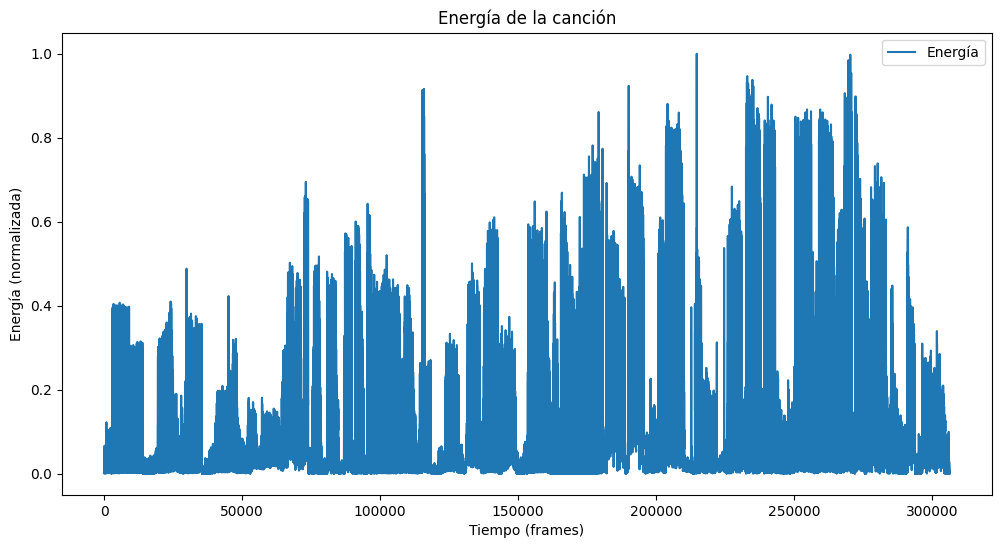

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Ruta del archivo MP3
file_path = '/content/Floating Points, Caribou, & Palms Trax b2b at NTS Square Party [o0UsPnjE5sY].mp3'

# Cargar el audio con librosa
audio, sr = librosa.load(file_path, sr=None)  # sr=None para mantener la tasa de muestreo original

# Calcular la energía (cuadrado promedio de la amplitud)
frame_length = 2048  # Tamaño del marco para el cálculo
hop_length = 512     # Salto entre marcos

energy = np.array([
    np.sum(np.abs(audio[i:i+frame_length])**2)
    for i in range(0, len(audio), hop_length)
])

# Normalizar la energía
energy = energy / np.max(energy)

# Visualizar la energía en el tiempo
plt.figure(figsize=(12, 6))
plt.plot(energy, label='Energía')
plt.xlabel('Tiempo (frames)')
plt.ylabel('Energía (normalizada)')
plt.title('Energía de la canción')
plt.legend()
plt.show()


Extraer Metadata

In [ ]:
from yt_dlp import YoutubeDL

# URL del video de YouTube
url = 'https://www.youtube.com/watch?v=o0UsPnjE5sY'

# Opciones para yt-dlp
ydl_opts = {
    'quiet': True,  # Evita mostrar demasiada información en la terminal
    'skip_download': True,  # No descargar el video, solo obtener la metadata
}

# Extraer metadata
with YoutubeDL(ydl_opts) as ydl:
    info_dict = ydl.extract_info(url, download=False)

# Imprimir los metadatos
print("Título:", info_dict.get('title'))
print("Subido por:", info_dict.get('uploader'))
print("Duración (s):", info_dict.get('duration'))
print("Vistas:", info_dict.get('view_count'))
print("Descripción:", info_dict.get('description'))
print("URL del video:", info_dict.get('webpage_url'))


Título: Floating Points, Caribou, & Palms Trax b2b at NTS Square Party
Subido por: NTS
Duración (s): 3267
Vistas: 64157
Descripción: The full recording from the closing set at NTS' Square Party in Gillett Square, Dalston. Triple threat action from Floating Points, Caribou, and Palms Trax on FP's custom built Sunflower Sound System 🌻

#floatingpoints #caribou #palmstrax #dj #djmix 

https://www.instagram.com/floatingpoints/
https://www.instagram.com/cariboumusic/
https://www.instagram.com/palmstrax/

Subscribe to NTS: http://bit.ly/1l9oJQY 
https://www.nts.live
https://twitter.com/ntslive
https://instagram.com/nts_radio
https://www.facebook.com/ntsradiolive
https://www.tiktok.com/@nts_radio
URL del video: https://www.youtube.com/watch?v=o0UsPnjE5sY


In [ ]:
import requests
from bs4 import BeautifulSoup

# Función para buscar en 1001tracklists
def search_1001tracklists(query):
    # URL base de búsqueda
    search_url = "https://www.1001tracklists.com/search/"
    params = {"q": query}  # Parámetros de búsqueda

    # Realiza la solicitud HTTP
    response = requests.get(search_url, params=params)
    response.raise_for_status()  # Manejar errores HTTP

    # Parsear el contenido HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encuentra el primer resultado relevante
    first_result = soup.find('a', class_='tlLink')
    if first_result:
        # Construir la URL completa del tracklist
        return "https://www.1001tracklists.com" + first_result['href']
    else:
        return None

# Ejemplo de uso
query = "Floating Points, Caribou, & Palms Trax b2b at NTS Square Party"
tracklist_url = search_1001tracklists(query)
if tracklist_url:
    print(f"Tracklist encontrado: {tracklist_url}")
else:
    print("No se encontró una tracklist para la consulta proporcionada.")


HTTPError: 404 Client Error: Not Found for url: https://www.1001tracklists.com/search/?q=Floating+Points%2C+Caribou%2C+%26+Palms+Trax+b2b+at+NTS+Square+Party

In [ ]:
import requests
from bs4 import BeautifulSoup

# Función para buscar en 1001tracklists
def search_1001tracklists(query):
    # URL base de búsqueda
    search_url = "https://www.1001tracklists.com/search/"
    params = {"q": query}  # Parámetros de búsqueda

    # Encabezados para simular un navegador
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
    }

    # Realizar la solicitud HTTP
    response = requests.get(search_url, params=params, headers=headers)
    response.raise_for_status()  # Verificar errores HTTP

    # Parsear el contenido HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar el primer resultado relevante
    first_result = soup.find('a', class_='tlLink')
    if first_result:
        # Construir la URL completa del tracklist
        return "https://www.1001tracklists.com" + first_result['href']
    else:
        return None

# Ejemplo de uso
query = "Floating Points, Caribou, & Palms Trax b2b at NTS Square Party"
tracklist_url = search_1001tracklists(query)
if tracklist_url:
    print(f"Tracklist encontrado: {tracklist_url}")
else:
    print("No se encontró una tracklist para la consulta proporcionada.")


No se encontró una tracklist para la consulta proporcionada.


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

# Configura el path del driver
driver_path = "ruta/a/tu/chromedriver"  # Ejemplo: "C:/chromedriver.exe"

# Inicializa el navegador
driver = webdriver.Chrome(executable_path=driver_path)

# Abre la página
driver.get("https://www.google.com")

# Espera a que cargue el buscador
time.sleep(2)  # Esperar 2 segundos para asegurarse de que la página cargó

# Encuentra la barra de búsqueda por su nombre (en este

ModuleNotFoundError: No module named 'selenium'

In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 31.1 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt-get install -y wget unzip
!apt-get install -y chromium-browser
!wget https://chromedriver.storage.googleapis.com/117.0.5938.62/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!mv chromedriver /usr/bin/chromedriver
!chmod +x /usr/bin/chromedriver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,172 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,487 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,512 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpad

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time

# Configuración para usar Chrome en modo headless (sin interfaz gráfica)
chrome_options = Options()
chrome_options.add_argument("--headless")  # Sin interfaz gráfica
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")  # Opcional

# Configurar el servicio de ChromeDriver
service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(service=service, options=chrome_options)

# Abrir Google
driver.get("https://www.google.com")

# Esperar a que la página cargue
time.sleep(2)

# Encontrar el campo de búsqueda y realizar la búsqueda
search_box = driver.find_element(By.NAME, "q")
search_box.send_keys("Python Selenium tutorial")
search_box.send_keys(Keys.RETURN)

# Esperar para obtener resultados
time.sleep(5)

# Imprimir el título de la página (opcional)
print("Título de la página:", driver.title)

# Cerrar el navegador
driver.quit()

NoSuchDriverException: Message: Unable to obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Configurar el controlador automáticamente
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Ejemplo: abrir una página
driver.get("https://www.google.com")
print(driver.title)
driver.quit()


ModuleNotFoundError: No module named 'webdriver_manager'